## **MSc Major Research Project**

## **Exploring the effect of daytime physical activity on sleep quality**

Melania Czobit

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Daytime activity analysis**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/MRP/FitbitActivity.csv'
df = pd.read_csv(path)
df

,egoid,datadate,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
0,44869,2015-07-28,91,86.669746,11.979352,4034.0,1.0,1034.0,149.0,2.0,12.0,1211,75,9,4,1364.19900,159.79671,61.841969,35.46954
1,44869,2015-07-29,97,87.975342,8.990446,3702.0,0.0,769.0,153.0,0.0,0.0,1273,103,3,0,1322.14650,262.28818,11.997700,0.00000
2,44869,2015-07-30,100,83.281448,16.863153,3660.0,0.0,795.0,139.0,3.0,18.0,1267,109,15,16,1288.98170,232.89841,77.910057,127.26234
3,44869,2015-07-31,80,91.707787,12.464956,6016.0,13.0,954.0,259.0,0.0,0.0,846,295,2,0,954.04791,629.57526,2.224320,0.00000
4,44869,2015-08-01,78,101.268140,10.464320,9846.0,5.0,1078.0,282.0,24.0,8.0,628,502,0,0,702.88513,1080.83410,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357822,35925,2018-03-30,28,76.786240,11.834908,3951.0,3.0,1332.0,88.0,8.0,12.0,375,32,0,0,740.04407,174.29564,0.000000,0.00000
357823,35925,2018-03-31,56,82.338219,14.672435,14762.0,42.0,1163.0,167.0,49.0,61.0,674,145,0,0,1335.35630,910.30292,0.000000,0.00000
357824,35925,2018-04-01,58,78.426506,16.393349,13986.0,31.0,1132.0,198.0,58.0,52.0,694,136,0,0,1384.27310,849.63190,0.000000,0.00000
357825,35925,2018-04-02,48,89.128021,16.900349,19277.0,12.0,1090.0,168.0,82.0,100.0,483,218,2,0,1087.21060,1419.65470,20.659019,0.00000


In [4]:
df.shape

(357827, 19)

In [5]:
df['datadate'] = pd.to_datetime(df['datadate'])
df = df.rename(columns={'datadate': 'date'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357827 entries, 0 to 357826
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   egoid                 357827 non-null  int64         
 1   date                  357827 non-null  datetime64[ns]
 2   complypercent         357827 non-null  int64         
 3   meanrate              357827 non-null  float64       
 4   sdrate                357826 non-null  float64       
 5   steps                 356751 non-null  float64       
 6   floors                356927 non-null  float64       
 7   sedentaryminutes      355844 non-null  float64       
 8   lightlyactiveminutes  355844 non-null  float64       
 9   fairlyactiveminutes   357823 non-null  float64       
 10  veryactiveminutes     355844 non-null  float64       
 11  lowrangemins          357827 non-null  int64         
 12  fatburnmins           357827 non-null  int64         
 13 

In [7]:
df2 = df.copy()
df2 = df2.set_index(['date'])

In [42]:
# It was found that some indivuals have recorded values for the same given day
temp = df2[df2.egoid==23287]
print(temp.index.is_unique)
temp.loc['2015-08-13']

False


,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
date,,,,,,,,,,,,,,,,,,
2015-08-13,23287,98,52.676079,11.336383,7253.0,1.0,551.0,175.0,6.0,0.0,1346,0,0,0,2465.1897,0.0,0.0,0.0
2015-08-13,23287,98,52.676079,11.336383,7253.0,1.0,NaN,NaN,6.0,NaN,1346,0,0,0,2465.1897,0.0,0.0,0.0


In [51]:
temp = temp.reset_index() # makes date column part of your data
temp = temp.drop_duplicates('date',keep='first').set_index('date')
print(temp.index.is_unique)
temp.loc['2015-08-13']

True


egoid                   23287.000000
complypercent              98.000000
meanrate                   52.676079
sdrate                     11.336383
steps                    7253.000000
floors                      1.000000
sedentaryminutes          551.000000
lightlyactiveminutes      175.000000
fairlyactiveminutes         6.000000
veryactiveminutes           0.000000
lowrangemins             1346.000000
fatburnmins                 0.000000
cardiomins                  0.000000
peakmins                    0.000000
lowrangecal              2465.189700
fatburncal                  0.000000
cardiocal                   0.000000
peakcal                     0.000000
Name: 2015-08-13 00:00:00, dtype: float64

In [11]:
ids = df2['egoid'].value_counts().index.to_list()

df3 = pd.DataFrame()
for i in ids:
  temp = df2[df2.egoid==i]
  if (temp.index.is_unique == False):
    temp = temp.reset_index() # makes date column part of your data
    temp = temp.drop_duplicates('date',keep='first').set_index('date')
  
  temp = temp.resample('D').ffill()
  temp = temp.fillna(temp.mean())
  df3 = df3.append(temp)

In [12]:
df3

,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
date,,,,,,,,,,,,,,,,,,
2015-07-26,23287,100,58.269985,21.795397,4056.0,6.0,620.0,153.0,9.0,45.0,1376,16,32,2,2361.26810,126.885720,436.44537,28.672541
2015-07-27,23287,91,54.651180,11.042264,7209.0,19.0,761.0,128.0,9.0,22.0,1311,2,0,0,2404.60110,16.866199,0.00000,0.000000
2015-07-28,23287,97,57.792439,20.188248,8805.0,18.0,730.0,103.0,4.0,72.0,1252,9,35,0,2296.00880,85.109444,473.16177,0.000000
2015-07-29,23287,100,57.031990,12.625061,10242.0,15.0,780.0,129.0,12.0,47.0,1424,14,0,0,2717.92330,124.290920,0.00000,0.000000
2015-07-30,23287,98,59.058781,19.435152,6344.0,11.0,781.0,124.0,12.0,56.0,1364,24,24,0,2425.48930,244.949130,312.15445,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-16,57045,81,73.216454,13.576087,8038.0,14.0,520.0,242.0,8.0,1.0,1118,37,0,0,1910.49930,180.135760,0.00000,0.000000
2016-07-17,57045,73,83.410645,11.666415,10980.0,15.0,1002.0,438.0,0.0,0.0,970,82,0,0,2057.78880,307.602260,0.00000,0.000000
2016-07-18,57045,98,70.724930,10.990591,6631.0,7.0,596.0,277.0,0.0,0.0,1385,11,0,0,2246.22240,61.428249,0.00000,0.000000


In [ ]:
df.describe()

,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
count,357827.000000,357827.000000,357827.000000,357826.000000,356751.000000,356927.000000,355844.000000,355844.000000,357823.000000,355844.000000,357827.000000,357827.000000,357827.000000,357827.000000,357827.000000,357827.000000,357827.000000,357827.000000
mean,56376.037180,85.228499,74.001024,15.430787,11051.223360,17.236592,798.992190,203.326781,25.326321,31.179885,1100.332739,113.356653,4.134316,0.953796,1698.248551,557.377978,38.888236,10.776925
std,25759.271748,22.456762,9.594119,4.220816,5873.476411,19.416539,265.477736,97.808326,30.709126,36.190696,314.921616,103.457654,9.883374,4.534229,633.774136,511.034060,99.952610,54.906745
min,10237.000000,1.000000,40.174862,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33740.000000,83.000000,67.280514,12.597967,6948.000000,7.000000,631.000000,151.000000,4.000000,2.000000,1004.000000,39.000000,0.000000,0.000000,1328.779700,185.058885,0.000000,0.000000
50%,56543.000000,96.000000,73.469315,15.047787,10592.000000,13.000000,728.000000,205.000000,16.000000,20.000000,1219.000000,86.000000,0.000000,0.000000,1709.270400,432.766390,0.000000,0.000000
75%,79167.000000,98.000000,80.047359,17.926842,14458.000000,21.000000,871.000000,261.000000,35.000000,47.000000,1315.000000,156.000000,3.000000,0.000000,2117.576800,776.951845,24.386604,0.000000
max,99978.000000,100.000000,190.721850,66.399506,87677.000000,670.000000,1440.000000,937.000000,506.000000,650.000000,1440.000000,1344.000000,343.000000,428.000000,5644.347200,8111.299800,4543.892100,4822.670900


In [13]:
df3.describe()

,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
count,460962.000000,460962.000000,460962.000000,460962.000000,460962.000000,460962.000000,460962.000000,460962.000000,460962.000000,460962.000000,460962.000000,460962.000000,460962.00000,460962.000000,460962.000000,460962.000000,460962.000000,460962.000000
mean,55792.633824,74.444655,74.467057,15.067147,9819.690548,15.492886,878.049125,176.912082,22.047863,27.417933,961.247504,98.488665,3.77240,0.865104,1475.358362,483.029194,34.930114,9.714507
std,25709.265766,31.126616,11.217580,4.854518,6222.773730,19.660870,305.037460,107.288491,29.414526,34.935633,418.916833,100.087805,9.43253,4.283183,750.834914,497.620128,94.421985,51.655100
min,10237.000000,1.000000,40.174862,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33388.000000,54.000000,66.934288,12.038574,5198.000000,5.000000,657.000000,102.000000,0.000000,0.000000,682.000000,25.000000,0.00000,0.000000,953.840238,113.000220,0.000000,0.000000
50%,55340.000000,92.000000,73.563964,14.683105,9481.000000,12.000000,777.000000,185.000000,12.000000,16.000000,1144.000000,70.000000,0.00000,0.000000,1550.799200,347.886600,0.000000,0.000000
75%,77872.000000,98.000000,80.810100,17.775765,13597.000000,20.000000,1116.000000,247.000000,31.000000,41.000000,1292.000000,140.000000,3.00000,0.000000,2001.866150,692.277830,19.702751,0.000000
max,99978.000000,100.000000,190.721850,66.399506,87677.000000,670.000000,1440.000000,937.000000,506.000000,650.000000,1440.000000,1344.000000,343.00000,428.000000,5644.347200,8111.299800,4543.892100,4822.670900


In [14]:
df.isnull().sum()

egoid                      0
date                       0
complypercent              0
meanrate                   0
sdrate                     1
steps                   1076
floors                   900
sedentaryminutes        1983
lightlyactiveminutes    1983
fairlyactiveminutes        4
veryactiveminutes       1983
lowrangemins               0
fatburnmins                0
cardiomins                 0
peakmins                   0
lowrangecal                0
fatburncal                 0
cardiocal                  0
peakcal                    0
dtype: int64

In [ ]:
df.isnull().groupby(df['egoid']).sum()

,egoid,datadate,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
egoid,,,,,,,,,,,,,,,,,,,
10237,0,0,0,0,0,0,8,18,18,0,18,0,0,0,0,0,0,0,0
10469,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0
10547,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11002,0,0,0,0,0,0,12,18,18,0,18,0,0,0,0,0,0,0,0
11128,0,0,0,0,0,1,8,18,18,0,18,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98760,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
98766,0,0,0,0,0,0,10,18,18,0,18,0,0,0,0,0,0,0,0


In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,3)))

egoid - 0.0%
datadate - 0.0%
complypercent - 0.0%
meanrate - 0.0%
sdrate - 0.0%
steps - 0.301%
floors - 0.252%
sedentaryminutes - 0.554%
lightlyactiveminutes - 0.554%
fairlyactiveminutes - 0.001%
veryactiveminutes - 0.554%
lowrangemins - 0.0%
fatburnmins - 0.0%
cardiomins - 0.0%
peakmins - 0.0%
lowrangecal - 0.0%
fatburncal - 0.0%
cardiocal - 0.0%
peakcal - 0.0%


In [16]:
df3.isnull().sum()

egoid                   0
complypercent           0
meanrate                0
sdrate                  0
steps                   0
floors                  0
sedentaryminutes        0
lightlyactiveminutes    0
fairlyactiveminutes     0
veryactiveminutes       0
lowrangemins            0
fatburnmins             0
cardiomins              0
peakmins                0
lowrangecal             0
fatburncal              0
cardiocal               0
peakcal                 0
dtype: int64

In [ ]:
df_time = pd.DataFrame()
df_time['timestamp_dt'] = pd.to_datetime(df['datadate'], format='%Y-%m-%d')
df_time['year'] = df_time['timestamp_dt'].dt.year
df_time['month'] = df_time['timestamp_dt'].dt.month
df_time['weekday'] = df_time['timestamp_dt'].dt.weekday
df_time

,timestamp_dt,year,month,weekday
0,2015-07-28,2015,7,1
1,2015-07-29,2015,7,2
2,2015-07-30,2015,7,3
3,2015-07-31,2015,7,4
4,2015-08-01,2015,8,5
...,...,...,...,...
357822,2018-03-30,2018,3,4
357823,2018-03-31,2018,3,5
357824,2018-04-01,2018,4,6
357825,2018-04-02,2018,4,0


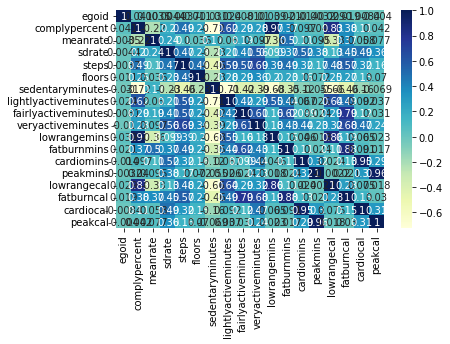

In [52]:
corr_matrix=df3.corr()
sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True)

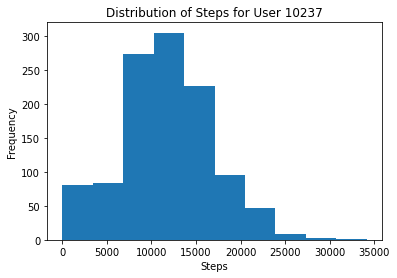

In [53]:
data = df3[df3['egoid']==10237]
plt.hist(data['steps'])
plt.title("Distribution of Steps for User 10237")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()

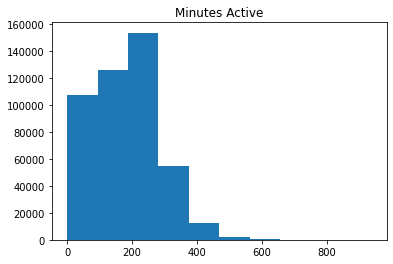

In [54]:
active = df3['lightlyactiveminutes']
plt.hist(active)
plt.title("Minutes Active")
plt.show()

## **Sleep Dataset Analysis**

In [17]:
path_sleep = '/content/drive/My Drive/MRP/FitbitSleep.csv'
df_sleep = pd.read_csv(path_sleep)
df_sleep

,egoid,dataDate,timetobed,timeoutofbed,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
0,44869,2015-07-28,6:25:00,10:27:00,243,0,0,232,11,0.954733
1,44869,2015-07-29,3:26:30,7:21:30,236,1,4,216,15,0.935065
2,44869,2015-07-29,12:03:30,16:44:30,282,3,0,267,12,0.956989
3,44869,2015-07-30,6:27:30,14:31:30,485,4,0,451,30,0.937630
4,44869,2015-07-31,4:40:30,6:27:30,108,0,0,100,8,0.925926
...,...,...,...,...,...,...,...,...,...,...
333703,35925,2017-11-13,23:45:00,9:15:00,571,0,0,533,38,0.933450
333704,35925,2017-11-16,23:16:30,8:20:30,545,0,1,489,55,0.898897
333705,35925,2017-11-26,4:19:00,8:43:00,265,6,1,249,9,0.965116
333706,35925,2017-12-17,17:55:30,19:11:30,77,2,3,70,2,0.972222


In [18]:
df_sleep['dataDate'] = pd.to_datetime(df_sleep['dataDate'])

In [19]:
df_sleep = df_sleep.rename(columns={'dataDate': 'date'})

In [20]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333708 entries, 0 to 333707
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   egoid             333708 non-null  int64         
 1   date              333708 non-null  datetime64[ns]
 2   timetobed         333708 non-null  object        
 3   timeoutofbed      333706 non-null  object        
 4   bedtimedur        333708 non-null  int64         
 5   minstofallasleep  333708 non-null  int64         
 6   minsafterwakeup   333708 non-null  int64         
 7   minsasleep        333708 non-null  int64         
 8   minsawake         333708 non-null  int64         
 9   Efficiency        333708 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 25.5+ MB


In [62]:
df_sleep2 = df_sleep.copy()
df_sleep2 = df_sleep2.set_index(['date'])

ids_sleep = df_sleep2['egoid'].value_counts().index.to_list()

df_sleep3 = pd.DataFrame()
for i in ids_sleep:
  temp = df_sleep2[df_sleep2.egoid==i]
  if (temp.index.is_unique == False):
    temp = temp.reset_index() # makes date column part of your data
    temp = temp.drop_duplicates('date',keep='first').set_index('date')
  
  temp = temp.resample('D').ffill()
  # temp = temp.fillna(temp.mean())
  df_sleep3 = df_sleep3.append(temp)

In [64]:
df_sleep3

,egoid,timetobed,timeoutofbed,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
date,,,,,,,,,
2015-08-11,22455,0:14:30,6:30:30,377,3,1,357,16,0.957105
2015-08-12,22455,19:30:00,5:31:00,602,4,0,566,32,0.946488
2015-08-13,22455,0:15:30,7:19:30,425,3,0,385,37,0.912322
2015-08-14,22455,23:27:30,6:39:30,433,3,0,403,27,0.937209
2015-08-15,22455,0:50:30,5:42:30,293,0,0,274,19,0.935154
...,...,...,...,...,...,...,...,...,...
2016-07-12,76791,17:21:39,17:32:39,12,0,0,12,0,1.000000
2016-07-13,76791,1:14:30,6:58:30,345,2,0,333,10,0.970845
2016-10-07,63954,2:37:00,9:03:00,387,5,0,355,27,0.929319


In [65]:
df_sleep3.isnull().sum()

egoid               0
timetobed           0
timeoutofbed        0
bedtimedur          0
minstofallasleep    0
minsafterwakeup     0
minsasleep          0
minsawake           0
Efficiency          0
dtype: int64

In [24]:
df_sleep3.describe()

,egoid,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
count,455973.000000,455973.000000,455973.000000,455973.000000,455973.000000,455973.000000,455973.000000
mean,55890.350168,420.911519,2.753720,1.166955,390.511741,26.479103,0.937034
std,25677.916793,138.765922,9.547902,4.322896,131.766439,29.707599,0.068050
min,10237.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.062092
25%,33657.000000,357.000000,0.000000,0.000000,328.000000,11.000000,0.922581
50%,55424.000000,437.000000,2.000000,0.000000,408.000000,21.000000,0.949212
75%,77941.000000,505.000000,3.000000,1.000000,473.000000,34.000000,0.970149
max,99978.000000,1370.000000,381.000000,281.000000,1295.000000,561.000000,1.000000


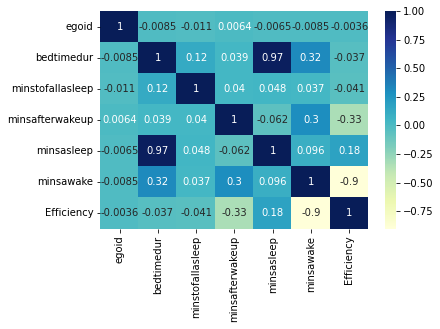

In [66]:
corr_matrix=df_sleep3.corr()
sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True)

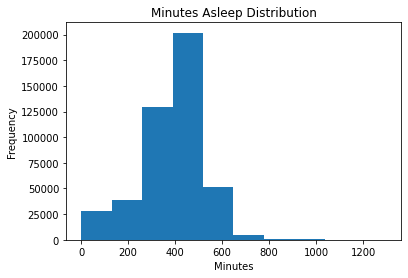

In [28]:
sleep = df_sleep3['minsasleep']
plt.hist(sleep)
plt.title("Minutes Asleep Distribution")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

**Merging the two datasets**

In [30]:
daily_ids = df3['egoid'].value_counts().index.to_list()
sleep_ids = df_sleep3['egoid'].value_counts().index.to_list()

In [31]:
missing_id = [item for item in daily_ids if item not in sleep_ids]
print(missing_id)
missing_id2 =  [item for item in sleep_ids if item not in daily_ids]
print(missing_id2)

[55340]
[]


In [32]:
# remove egoid 55340 as no sleep data collected
df3 = df3[df3.egoid != 55340]

In [34]:
daily = df3['egoid'].value_counts().to_dict()
sleep = df_sleep3['egoid'].value_counts().to_dict()

print(daily)
print(sleep)

{89710: 1394, 23287: 1392, 62617: 1392, 94641: 1391, 67918: 1390, 46365: 1390, 22138: 1390, 86440: 1388, 57359: 1388, 83566: 1387, 21090: 1386, 70125: 1385, 72885: 1385, 71985: 1385, 71089: 1384, 92566: 1384, 77036: 1384, 98700: 1382, 63904: 1381, 22688: 1381, 63347: 1381, 87328: 1381, 99978: 1380, 84390: 1380, 46558: 1380, 82986: 1379, 57443: 1379, 38610: 1378, 33009: 1378, 19735: 1377, 77711: 1376, 64296: 1376, 25548: 1375, 14279: 1375, 98325: 1375, 92515: 1374, 78783: 1371, 26718: 1371, 21932: 1371, 89607: 1371, 22408: 1370, 67608: 1369, 52302: 1369, 34467: 1368, 85503: 1368, 91551: 1367, 97596: 1367, 70492: 1367, 99733: 1367, 35872: 1367, 95559: 1366, 25197: 1366, 88882: 1366, 27306: 1365, 36552: 1364, 51437: 1364, 28327: 1364, 43382: 1363, 44927: 1363, 93002: 1362, 95543: 1360, 33657: 1360, 22455: 1360, 33785: 1359, 14737: 1359, 66815: 1359, 67709: 1359, 24883: 1359, 14847: 1357, 34062: 1357, 94579: 1355, 73158: 1355, 96610: 1352, 46418: 1352, 37404: 1348, 92412: 1346, 43794: 1344

In [35]:
daily.keys() == sleep.keys()

True

In [67]:
remove_daily = []
remove_sleep = []

for key in daily:
  if daily[key] < 180:
    remove_daily.append(key)

for key in sleep:
  if sleep[key] < 180:
    remove_sleep.append(key)


remove_ids = list(set(remove_daily + remove_sleep))
print(remove_ids)

[19460, 28681, 76810, 74251, 35855, 82964, 90136, 27169, 65061, 34344, 52277, 33341, 93246, 66629, 75341, 89165, 30814, 80484, 13928, 46701, 37485, 65143, 11910, 63122, 42132, 28824, 56480, 33445, 72873, 29354, 17581, 14511, 20665, 67771, 36540, 91337, 45776, 57045, 11482, 80607, 92895, 76521, 51952, 42231, 48891, 42773, 92953, 40231, 59178, 31538, 10547, 18743, 75578, 33084, 88384, 98624, 89411, 31045, 78667, 67917, 39248, 14690, 66406, 61289, 35180, 70005, 19833, 88963, 90502, 21909, 44447, 66979, 14763, 16819, 29115, 92618, 57292, 12748, 85453, 24016, 64978, 63954, 67544, 73693, 41952, 72160, 74211, 60903, 43507, 76791, 32249, 57854]


In [68]:
for id in remove_ids:
  df3 = df3[df3.egoid != id]
  df_sleep3 = df_sleep3[df_sleep3.egoid != id]

In [40]:
# for key in daily:
#     if key in sleep:
#       print(key, daily[key], sleep[key])

In [69]:
# Some days reported are missing either daytime or sleep data
# joining the two tables will be an inner join, dropping rows that do not have complete data for a given day 
print(len(df3))
print(len(df_sleep3))

451012
448056


In [70]:
df_all = df3.merge(df_sleep3, how='inner', on=["egoid","date"])
df_all

,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,...,cardiocal,peakcal,timetobed,timeoutofbed,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
date,,,,,,,,,,,,,,,,,,,,,
2015-07-26,23287,100,58.269985,21.795397,4056.0,6.0,620.0,153.0,9.0,45.0,...,436.445370,28.672541,0:18:00,10:30:00,613,0,14,590,9,0.984975
2015-07-27,23287,91,54.651180,11.042264,7209.0,19.0,761.0,128.0,9.0,22.0,...,0.000000,0.000000,0:07:00,7:08:00,422,3,0,403,16,0.961814
2015-07-28,23287,97,57.792439,20.188248,8805.0,18.0,730.0,103.0,4.0,72.0,...,473.161770,0.000000,22:22:00,7:14:00,533,2,5,514,12,0.977186
2015-07-29,23287,100,57.031990,12.625061,10242.0,15.0,780.0,129.0,12.0,47.0,...,0.000000,0.000000,22:24:00,7:10:00,527,32,6,316,173,0.646217
2015-07-30,23287,98,59.058781,19.435152,6344.0,11.0,781.0,124.0,12.0,56.0,...,312.154450,0.000000,23:19:00,6:50:00,452,3,2,440,7,0.984340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-26,54837,47,74.980034,12.485730,2006.0,2.0,1270.0,138.0,1.0,10.0,...,0.000000,0.000000,2:25:00,12:40:00,616,0,0,581,35,0.943182
2016-05-27,54837,65,66.002235,25.104258,6654.0,15.0,746.0,34.0,3.0,63.0,...,428.440160,35.777420,23:39:00,9:53:00,615,0,0,580,35,0.943089
2016-05-28,54837,84,68.034920,18.201899,4626.0,2.0,710.0,205.0,39.0,4.0,...,24.221979,10.444340,0:40:30,8:41:30,482,0,0,423,59,0.877593
